In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("matinsajadi/flights")

print("Path to dataset files:", path)

c:\Users\valen\OneDrive\Escritorio\Juano_VS\Travel-Insurance\travel\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\valen\.cache\kagglehub\datasets\matinsajadi\flights\versions\1


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error

In [3]:
#df = pd.read_csv (r'C:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 10\Travel-Insurance\Data\flights.csv')
df = pd.read_csv (r'C:\Users\valen\OneDrive\Escritorio\Juano_VS\Travel-Insurance\Data\flights.csv')
df = df.drop (['id', 'year', 'dep_time', 'tailnum', 'origin', 'dest', 'carrier', 'flight', 'time_hour', 'sched_arr_time', 'sched_dep_time', 'arr_time'], axis =1)
df = df.dropna (subset=['dep_delay', 'arr_delay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      327346 non-null  int64  
 1   day        327346 non-null  int64  
 2   dep_delay  327346 non-null  float64
 3   arr_delay  327346 non-null  float64
 4   air_time   327346 non-null  float64
 5   distance   327346 non-null  int64  
 6   hour       327346 non-null  int64  
 7   minute     327346 non-null  int64  
 8   name       327346 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 25.0+ MB


In [4]:
print (df.shape)

(327346, 9)


In [5]:
df_ohe = pd.get_dummies(df, drop_first=True, dtype=int)
X = df_ohe.drop ('arr_delay', axis=1)
y = df_ohe['arr_delay']
x_train, x_valid, y_train,y_valid = train_test_split (X, y, test_size=0.25, random_state=12345)
numeric = ['month', 'day', 'dep_delay', 'air_time', 'distance', 'hour', 'minute']
scaler = StandardScaler ()
scaler.fit (x_train[numeric])
x_train[numeric] = scaler.transform (x_train[numeric])
x_valid[numeric] = scaler.transform (x_valid[numeric])

In [6]:
model = LinearRegression()
model.fit (x_train, y_train)
predicted_valid = model.predict(x_valid)
mse = mean_squared_error(y_valid, predicted_valid)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 234.72677274680933
RMSE: 15.32079543453307


In [7]:
constante = y_train.mean()
predicted_valid_const = [constante] * len(y_valid)
mse = mean_squared_error(y_valid, predicted_valid_const)
print('MSE:', mse)
print ('RMSE:', np.sqrt(mse))

MSE: 1965.8438954848446
RMSE: 44.3378381913783


# R^2

R^2 = Modelo ECM/Media ECM
- r2 = 1, Modelo perfecto
- r2 = 0, Modelo aleatorio
- R2 -> Negativo, peor que un modelo aleatorio


In [8]:
print ('r2 score:', r2_score(y_valid, predicted_valid))
print (model.score(x_valid, y_valid))

r2 score: 0.8805970451604433
0.8805970451604433


In [10]:
best_score = 0
best_depth = 0
for depth in range (1,16,1): 
    forest = RandomForestRegressor (n_estimators=20, random_state=12345, max_depth=depth)
    forest.fit (x_train, y_train)
    score = forest.score (x_valid, y_valid)
    if score > best_score: 
        best_score = score 
        best_depth = depth
print (best_depth, best_score)


15 0.880993345904476


In [12]:
model = RandomForestRegressor (n_estimators=100, max_depth=15, random_state=12345)
model.fit (x_train, y_train)
print (model.score (x_train, y_train))
print (model.score (x_valid, y_valid))

0.9136834824659872
0.8822248554491031


# Error absoluto medio 

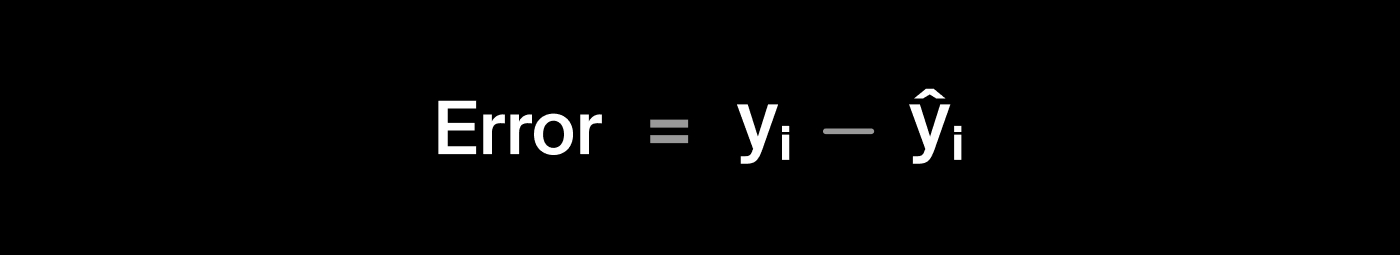

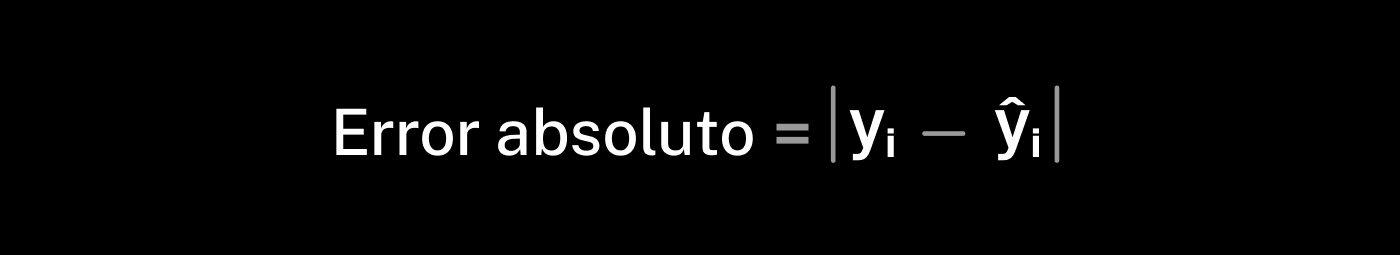

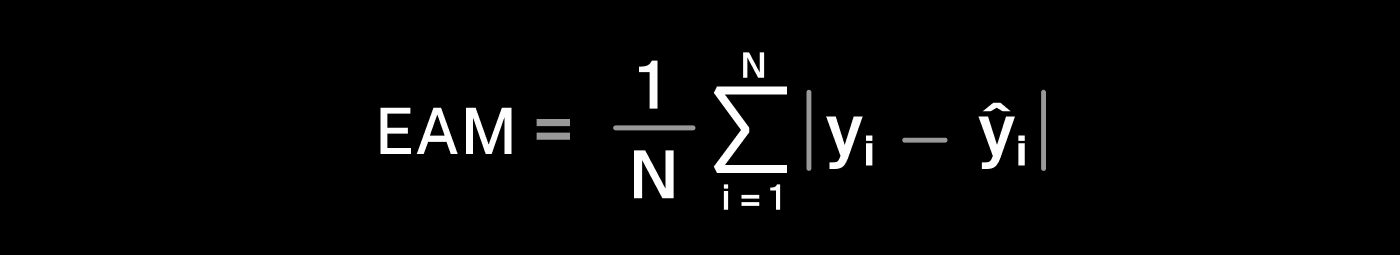


In [22]:
# Function to calculate Mean Absolute Error (MAE)

def mae(target, predictions):
    return np.mean(np.abs(target - predictions))

In [24]:
print (mae(y_valid, predicted_valid))
print (mean_absolute_error(y_valid, predicted_valid))

10.921171163737817
10.921171163737817
